**Importing NLTK and other libraries:**

In [23]:
import nltk
nltk.download('book', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt', quiet=True)

True

In [2]:
import requests
from urllib.parse import urlsplit
from bs4 import BeautifulSoup

**For downloading the text from a White House press statement present in this URL link:**

In [3]:
url = 'https://www.whitehouse.gov/briefing-room/statements-releases/2021/11/30/bills-signed-bills-signed-s-769-s-894-s-1031-and-s-1095/'

In [4]:
data = requests.get(url).text

In [5]:
data[:100]

'<!doctype html>\n<html class="no-js alert__has-cookie" lang="en-US">\n<head>\n\t<meta charset="utf-8">\n\t'

**Converting above to a BeautifulSoup object, using which we can extract the subparts easily:**

In [6]:
soup = BeautifulSoup(data)

**Using the "Inspect element in a browser", we projected out that we require the text out of all the paragraphs that are inside the part, which has the following structure:**

```html
<section class="body-content">
...
</section>
```

In [7]:
sections = soup.find_all('section', class_='body-content')

In [8]:
len(sections)

1

In [9]:
section = soup.find('section', class_='body-content')

In [10]:
ps = section.find_all('p')

In [11]:
len(ps)

9

In [12]:
ps[0]

<p>On Tuesday, November 30, 2021, the President signed into law:</p>

In [13]:
ps[2].get_text()

'Thank you to Senators Warnock, Moran, Menendez, Murray, Blumenthal, Murphy, Leahy, Lujan, and Tester and Representatives Takano and Bost for their leadership;'

In [14]:
ptexts = [p.get_text() for p in section.find_all('p')]

In [15]:
ptexts[7]

'S. 1095, the “Colonel John M. McHugh Tuition Fairness for Survivors Act of 2021,” which requires the Department of Veterans Affairs to disapprove any course of education offered by public institutions of higher learning that do not charge the in-State tuition rate to individuals using education benefits under the Survivors’ and Dependents’ Educational Assistance Program,'

**Further, for the processing of pipeline: we need to start with `sentence tokenization`, followed by `word tokenization`, and then `part of speech tagging`:**

In [17]:
[nltk.word_tokenize(s) for s in nltk.sent_tokenize(ptexts[7])]

[['S.',
  '1095',
  ',',
  'the',
  '“',
  'Colonel',
  'John',
  'M.',
  'McHugh',
  'Tuition',
  'Fairness',
  'for',
  'Survivors',
  'Act',
  'of',
  '2021',
  ',',
  '”',
  'which',
  'requires',
  'the',
  'Department',
  'of',
  'Veterans',
  'Affairs',
  'to',
  'disapprove',
  'any',
  'course',
  'of',
  'education',
  'offered',
  'by',
  'public',
  'institutions',
  'of',
  'higher',
  'learning',
  'that',
  'do',
  'not',
  'charge',
  'the',
  'in-State',
  'tuition',
  'rate',
  'to',
  'individuals',
  'using',
  'education',
  'benefits',
  'under',
  'the',
  'Survivors',
  '’',
  'and',
  'Dependents',
  '’',
  'Educational',
  'Assistance',
  'Program',
  ',']]

In [18]:
tagger = nltk.tag.perceptron.PerceptronTagger()

In [25]:
url = 'https://www.whitehouse.gov/briefing-room/statements-releases/2021/11/30/bills-signed-bills-signed-s-769-s-894-s-1031-and-s-1095/'

In [26]:
def process_url(url):
  soup = BeautifulSoup(requests.get(url).text)
  section = soup.find('section', class_='body-content')
  return [tagger.tag(nltk.word_tokenize(s)) 
            for p in section.find_all('p') 
            for s in nltk.sent_tokenize(p.get_text())]

In [27]:
doc = process_url(url)

In [28]:
for s in doc[:3]:
  for w,t in s:
    print(f'{w}_{t}', end=' ')
  print()

On_IN Tuesday_NNP ,_, November_NNP 30_CD ,_, 2021_CD ,_, the_DT President_NNP signed_VBD into_IN law_NN :_: 
S._NNP 796_CD ,_, the_DT “_NN Protecting_NNP Moms_NNP Who_NNP Served_NNP Act_NNP of_IN 2021_CD ,_, ”_NNP which_WDT codifies_VBZ the_DT Department_NNP of_IN Veterans_NNP Affairs_NNP current_JJ maternity_NN care_NN coordination_NN program_NN ,_, 
Thank_NNP you_PRP to_TO Senators_NNPS Warnock_NNP ,_, Moran_NNP ,_, Menendez_NNP ,_, Murray_NNP ,_, Blumenthal_NNP ,_, Murphy_NNP ,_, Leahy_NNP ,_, Lujan_NNP ,_, and_CC Tester_NNP and_CC Representatives_NNP Takano_NNP and_CC Bost_NNP for_IN their_PRP$ leadership_NN ;_: 


In [29]:
!mkdir -p wh

In [30]:
filename = 'wh/' + urlsplit(url).path.replace('/', '_')  + '.txt'

In [32]:
with open(filename, 'w') as f:
  for s in doc:
    for w,t in s:
      print(f'{w}_{t}', end=' ', file=f)
    print(file=f)

In [33]:
def get_url(url):
  doc = process_url(url)
  filename = 'wh/' + urlsplit(url).path.replace('/', '_')  + '.txt'
  with open(filename, 'w') as f:
    for s in doc:
      for w,t in s:
        print(f'{w}_{t}', end=' ', file=f)
      print(file=f)

In [36]:
url = 'https://www.whitehouse.gov/briefing-room'
soup = BeautifulSoup(requests.get(url).text)

In [37]:
soup.find_all('link')

[<link href="https://gmpg.org/xfn/11" rel="profile"/>,
 <link href="https://www.whitehouse.gov/briefing-room/" rel="canonical"/>,
 <link href="https://www.whitehouse.gov/briefing-room/page/2/" rel="next"/>,
 <link as="font" crossorigin="anonymous" href="https://www.whitehouse.gov/wp-content/themes/whitehouse/assets/fonts/Decimal-Book.woff2" rel="preload" type="font/woff2"/>,
 <link as="font" crossorigin="anonymous" href="https://www.whitehouse.gov/wp-content/themes/whitehouse/assets/fonts/Decimal-Semibold.woff2" rel="preload" type="font/woff2"/>,
 <link as="font" crossorigin="anonymous" href="https://www.whitehouse.gov/wp-content/themes/whitehouse/assets/fonts/Decimal-Medium_Web.woff2" rel="preload" type="font/woff2"/>,
 <link as="font" crossorigin="anonymous" href="https://www.whitehouse.gov/wp-content/themes/whitehouse/assets/fonts/Decimal-Bold.woff2" rel="preload" type="font/woff2"/>,
 <link as="font" crossorigin="anonymous" href="https://www.whitehouse.gov/wp-content/themes/whiteho

In [38]:
soup.find_all('a', class_='news-item__title')

[<a class="news-item__title" href="https://www.whitehouse.gov/briefing-room/press-briefings/2022/07/13/background-press-call-previewing-day-two-of-the-presidents-trip-to-the-middle-east/">
 				Background Press Call Previewing Day Two of the President’s Trip to the Middle<span class="dewidow"> </span>East			</a>,
 <a class="news-item__title" href="https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/nec-director-deese-statement-on-panasonic-energy-announcement-in-kansas/">
 				NEC Director Deese Statement on Panasonic Energy Announcement in<span class="dewidow"> </span>Kansas			</a>,
 <a class="news-item__title" href="https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/nominations-sent-to-the-senate-74/">
 				Nominations Sent to the<span class="dewidow"> </span>Senate			</a>,
 <a class="news-item__title" href="https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/statement-from-president-biden-after-senate-confirmation-of-micha

In [39]:
for a in soup.find_all('a', class_='news-item__title'):
  url = a['href']
  print(url)
  get_url(url)

https://www.whitehouse.gov/briefing-room/press-briefings/2022/07/13/background-press-call-previewing-day-two-of-the-presidents-trip-to-the-middle-east/
https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/nec-director-deese-statement-on-panasonic-energy-announcement-in-kansas/
https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/nominations-sent-to-the-senate-74/
https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/statement-from-president-biden-after-senate-confirmation-of-michael-barr-to-the-federal-reserve/
https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/fact-sheet-president-biden-appoints-cancer-panel-members-and-cancer-cabinet-unveils-priority-actions/
https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/president-biden-names-twenty-second-round-of-judicial-nominees/
https://www.whitehouse.gov/briefing-room/statements-releases/2022/07/13/readout-of-white-house-listening-session-with

In [40]:
soup.find('link', rel="next")['href']

'https://www.whitehouse.gov/briefing-room/page/2/'

In [41]:
url = 'https://www.whitehouse.gov/briefing-room'

while url:
  print(url)
  soup = BeautifulSoup(requests.get(url).text)
  soup.find_all('a', class_='news-item__title')
  for a in soup.find_all('a', class_='news-item__title'):
    item_url = a['href']
    get_url(item_url)
  next = soup.find('link', rel='next')
  if next:
    url = next['href']
  else:
    url = None

https://www.whitehouse.gov/briefing-room
https://www.whitehouse.gov/briefing-room/page/2/
https://www.whitehouse.gov/briefing-room/page/3/
https://www.whitehouse.gov/briefing-room/page/4/
https://www.whitehouse.gov/briefing-room/page/5/
https://www.whitehouse.gov/briefing-room/page/6/
https://www.whitehouse.gov/briefing-room/page/7/
https://www.whitehouse.gov/briefing-room/page/8/
https://www.whitehouse.gov/briefing-room/page/9/
https://www.whitehouse.gov/briefing-room/page/10/
https://www.whitehouse.gov/briefing-room/page/11/
https://www.whitehouse.gov/briefing-room/page/12/
https://www.whitehouse.gov/briefing-room/page/13/
https://www.whitehouse.gov/briefing-room/page/14/
https://www.whitehouse.gov/briefing-room/page/15/
https://www.whitehouse.gov/briefing-room/page/16/
https://www.whitehouse.gov/briefing-room/page/17/
https://www.whitehouse.gov/briefing-room/page/18/
https://www.whitehouse.gov/briefing-room/page/19/
https://www.whitehouse.gov/briefing-room/page/20/
https://www.white

In [44]:
!zip -rq wh.zip wh

In [46]:
wh = nltk.corpus.reader.TaggedCorpusReader('wh', r'.*\.txt', sep='_')

In [47]:
words = list(iter(wh.words()))

In [48]:
len(words)

8329760

In [49]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [50]:
finder = nltk.collocations.BigramCollocationFinder.from_words(w.lower() for w in words)

In [52]:
finder.nbest(bigram_measures.pmi, 10)

[('-evidenced', 'tonight-'),
 ('0530', 'pt'),
 ('1,177', 'crewmen'),
 ('10,000latin', 'america/caribbean'),
 ('100-yard', 'wingspans'),
 ('105-degree', 'heat.and'),
 ('133,000', 'acres.in'),
 ('14,900', 'facilities.weekly'),
 ('15,000near', 'east/south'),
 ('18-wheeler', 'trucks.multiple')]

In [53]:
def skip(w):
  return not w.isalpha()
finder.apply_word_filter(skip)
finder.apply_freq_filter(10)

In [54]:
finder.nbest(bigram_measures.pmi, 10)

[('suu', 'kyi'),
 ('ku', 'klux'),
 ('mira', 'loma'),
 ('tel', 'aviv'),
 ('bader', 'ginsburg'),
 ('notre', 'dame'),
 ('des', 'moines'),
 ('ahmaud', 'arbery'),
 ('cortez', 'masto'),
 ('edmund', 'pettus')]

In [55]:
wh.fileids()[:5]

['_briefing-room_blog_2021_03_10_the-american-rescue-plan-passed-now-what_.txt',
 '_briefing-room_blog_2021_03_12_the-white-house-gender-policy-council-a-message-from-the-co-chairs_.txt',
 '_briefing-room_blog_2021_03_23_covid-19-has-exacerbated-the-economic-inequality-and-caregiving-crisis-facing-women-of-color-heres-how-the-american-rescue-plan-helps_.txt',
 '_briefing-room_blog_2021_03_29_approaching-policy-with-equity-in-mind_.txt',
 '_briefing-room_blog_2021_04_02_strengthening-our-nations-commitment-to-preventing-and-responding-to-gender-based-violence_.txt']

In [63]:
import re

def month(f):
  return re.findall(r'202[0-9]_[012][0-9]', f)[0]

In [62]:
[month(f) for f in wh.fileids()[:5]]

['2021_03', '2021_03', '2021_03', '2021_03', '2021_04']

In [64]:
counts = nltk.ConditionalFreqDist([(month(f), w.lower()) 
                for f in wh.fileids()
                for w in wh.words(f)])

In [65]:
[(c,counts[c]['coronavirus']/counts[c].N()) for c in sorted(counts)]

[('2021_01', 0.00019617303522101277),
 ('2021_02', 9.873967664021794e-05),
 ('2021_03', 5.2594567955103715e-05),
 ('2021_04', 2.932723326881342e-05),
 ('2021_05', 4.621128284953363e-05),
 ('2021_06', 1.8450865345584707e-05),
 ('2021_07', 2.5590719099206688e-05),
 ('2021_08', 3.304560056838433e-05),
 ('2021_09', 3.0457409373978408e-05),
 ('2021_10', 2.002378826045342e-05),
 ('2021_11', 2.527050931562866e-05),
 ('2021_12', 2.878330897031824e-05),
 ('2022_01', 3.757769187795768e-05),
 ('2022_02', 7.214243802964573e-06),
 ('2022_03', 2.33564172590577e-05),
 ('2022_04', 2.1117292481539965e-05),
 ('2022_05', 1.163446827571363e-05),
 ('2022_06', 4.344567661210614e-06),
 ('2022_07', 0.0)]

**Finding the hidden trends of few examples:**

In [128]:
import matplotlib.pyplot as plt

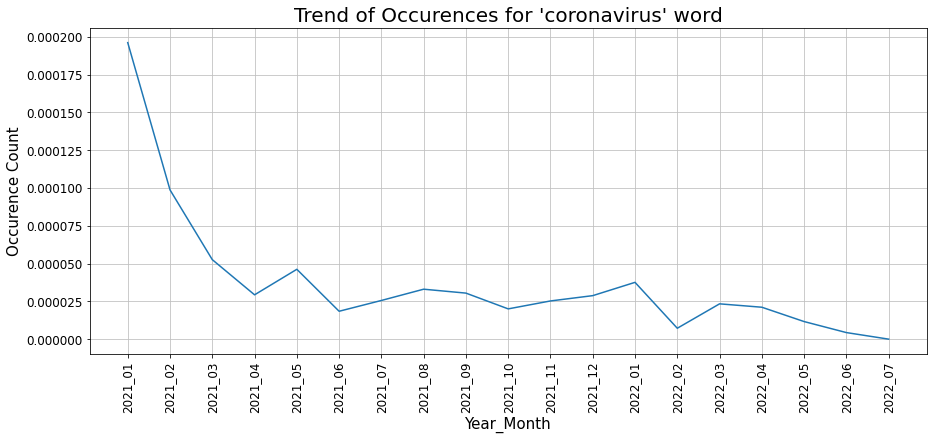

In [129]:
plt.figure(figsize=(15,6))
plt.plot([counts[c]['coronavirus']/counts[c].N() for c in sorted(counts)])
plt.xticks(range(len(counts)), sorted(counts), rotation=90)

plt.grid(True, color='silver')

plt.xlabel("Year_Month", fontsize = 15)
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize = 12)

plt.ylabel("Occurence Count", fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize = 12)

plt.title("Trend of Occurences for 'coronavirus' word", fontsize = 20)
plt.show()

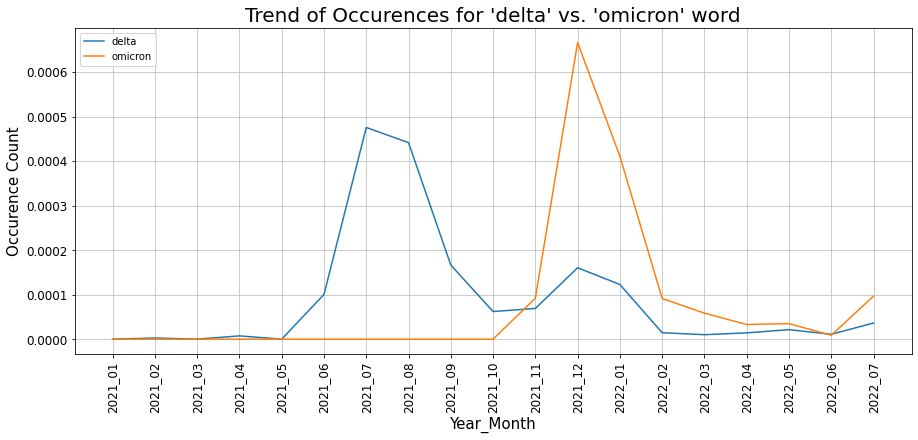

In [130]:
plt.figure(figsize=(15,6))
plt.plot([counts[c]['delta']/counts[c].N() for c in sorted(counts)], label = "delta")
plt.plot([counts[c]['omicron']/counts[c].N() for c in sorted(counts)], label = "omicron")
plt.xticks(range(len(counts)), sorted(counts), rotation=90)

plt.grid(True, color='silver')
plt.legend(loc='upper left')

plt.xlabel("Year_Month", fontsize = 15)
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize = 12)

plt.ylabel("Occurence Count", fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize = 12)

plt.title("Trend of Occurences for 'delta' vs. 'omicron' word", fontsize = 20)
plt.show()

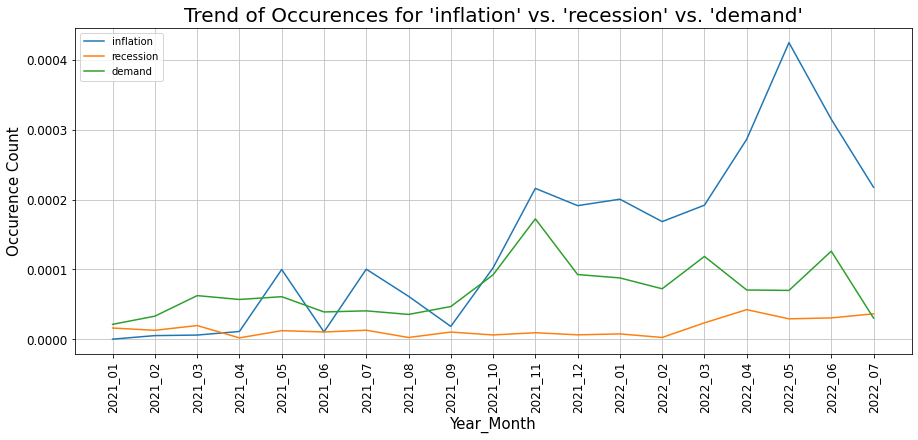

In [132]:
plt.figure(figsize=(15,6))
plt.plot([counts[c]['inflation']/counts[c].N() for c in sorted(counts)], label = "inflation")
plt.plot([counts[c]['recession']/counts[c].N() for c in sorted(counts)], label = "recession")
plt.plot([counts[c]['demand']/counts[c].N() for c in sorted(counts)], label = "demand")
plt.xticks(range(len(counts)), sorted(counts), rotation=90)

plt.grid(True, color='silver')
plt.legend(loc='upper left')

plt.xlabel("Year_Month", fontsize = 15)
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize = 12)

plt.ylabel("Occurence Count", fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize = 12)

plt.title("Trend of Occurences for 'inflation' vs. 'recession' vs. 'demand'", fontsize = 20)
plt.show()